In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab4 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 19 (delta 1), reused 3 (delta 0), pack-reused 12 (from 1)
Receiving objects: 100% (19/19), 3.68 MiB | 8.83 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [3]:
import os
os.listdir('images')

['one_coin.jpg',
 'roma_2.jpg',
 'crossword.jpg',
 'sudoku.png',
 'roma_1.jpg',
 'chess.jpg',
 'building_2.jpg',
 'building_1.jpg']

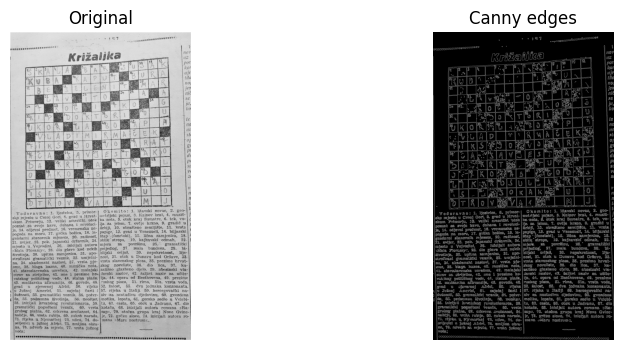

In [4]:
img = cv.imread('images/crossword.jpg', cv.IMREAD_GRAYSCALE)

blur = cv.GaussianBlur(img, (5,5), 0)
edges = cv.Canny(blur, 100, 200)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title('Canny edges')
plt.axis('off')

plt.show()


In [5]:
import math

def draw_lines(img, lines):
  a,b,c = lines.shape
  for i in range(a):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = math.cos(theta)
      b = math.sin(theta)
      x0, y0 = a*rho, b*rho
      pt1 = ( int(x0+1000*(-b)), int(y0+1000*(a)) )
      pt2 = ( int(x0-1000*(-b)), int(y0-1000*(a)) )
      cv.line(img, pt1, pt2, (255, 0, 0), 2, cv.LINE_AA)
  return img


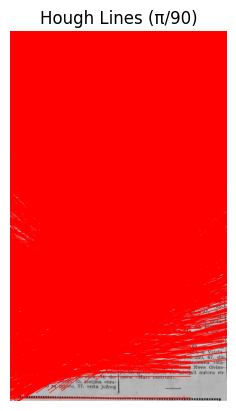

In [6]:
img = cv.imread('images/crossword.jpg', cv.IMREAD_GRAYSCALE)
blur = cv.GaussianBlur(img, (5,5), 0)
edges = cv.Canny(blur, 100, 200)

lines = cv.HoughLines(edges, 1, math.pi/90, 200, np.array([]), 0, 0)

img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_lines = draw_lines(img_color, lines)

plt.imshow(img_lines)
plt.title('Hough Lines (π/90)')
plt.axis('off')
plt.show()


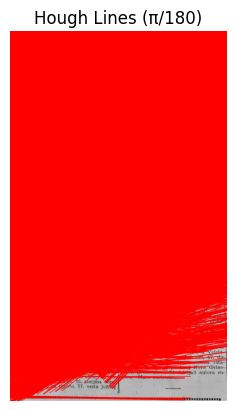

In [7]:
lines = cv.HoughLines(edges, 1, math.pi/180, 200)

img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
img_lines = draw_lines(img_color, lines)

plt.imshow(img_lines)
plt.title('Hough Lines (π/180)')
plt.axis('off')
plt.show()


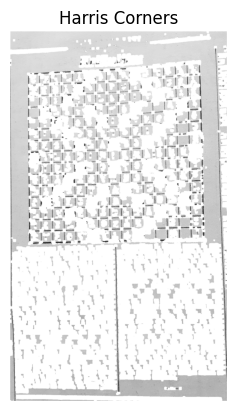

In [8]:
img = cv.imread('images/crossword.jpg', cv.IMREAD_GRAYSCALE)
img_f = np.float32(img)

corners = cv.cornerHarris(img_f, 15, 3, 0.05)

img_corners = img.copy()
img_corners[corners > 0.0001 * corners.max()] = 255

plt.imshow(img_corners, cmap='gray')
plt.title('Harris Corners')
plt.axis('off')
plt.show()



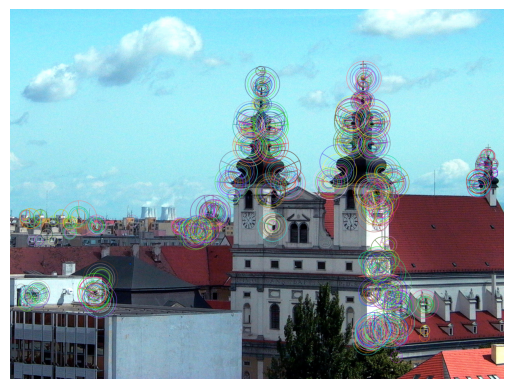

In [9]:
img1 = cv.imread('images/building_1.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread('images/building_2.jpg')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

orb = cv.ORB_create(1000)

key_points, description = orb.detectAndCompute(img1, None)

img_keypoints = cv.drawKeypoints(
    img1, key_points, None,
    flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.imshow(img_keypoints)
plt.axis('off')
plt.show()


In [10]:
def image_detect_and_compute(detector, img_name):
    img = cv2.imread(img_name)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img_gray, None)
    return img_gray, kp, des


In [11]:
def draw_image_matches(detector, img1_name, img2_name, nmatches=20):
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    img_matches = cv2.drawMatches(
        img1, kp1,
        img2, kp2,
        matches[:nmatches],
        None,
        flags=2
    )

    plt.figure(figsize=(14,6))
    plt.imshow(img_matches)
    plt.title('ORB Feature Matching')
    plt.axis('off')
    plt.show()


In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


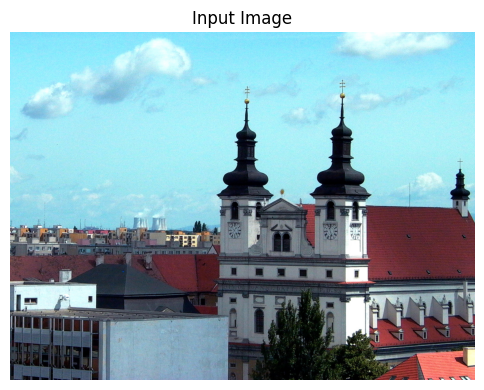

Number of keypoints detected: 1000


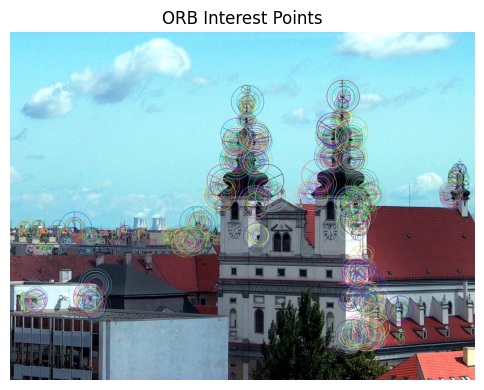

In [13]:
img = cv2.imread('images/building_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# prikaži original
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title('Input Image')
plt.axis('off')
plt.show()

# kreiraj ORB detektor
orb = cv2.ORB_create(1000)

# detektiraj keypoints i deskriptore
key_points, descriptors = orb.detectAndCompute(img, None)

print("Number of keypoints detected:", len(key_points))

# iscrtaj keypoints
img_keypoints = cv2.drawKeypoints(
    img,
    key_points,
    None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(6,6))
plt.imshow(img_keypoints)
plt.title('ORB Interest Points')
plt.axis('off')
plt.show()


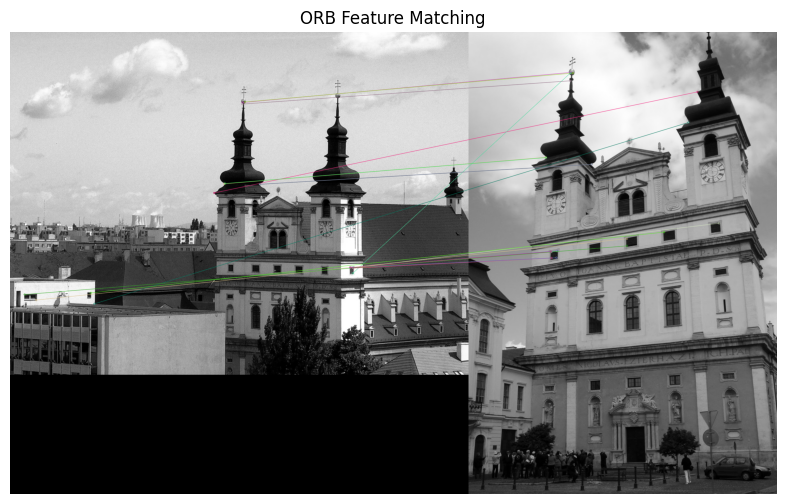

In [14]:
orb = cv2.ORB_create(1000)

draw_image_matches(
    orb,
    'images/building_1.jpg',
    'images/building_2.jpg',
    nmatches=20
)
